Our objective is to design an online method that can promptly
detect the presence of the chattering alarms due to oscillation and
effectively reduce the number of these chattering alarms, while the
requirements on FAR, MAR and AAD are satisfied.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def alarm_generate(x, var_list):
    '''alarm_generate is a function when return a vector '''
    t_delay = 0
    t_dead = 0
    log_alarm = np.arange(len(x))
  
    if var_list["type_var"] == 'high':
        for i in np.arange(len(x)):
            if x[i] > var_list["limit"]:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0
    else:
        for i in np.arange(len(x)):
            if x[i] < limit:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0

    return log_alarm

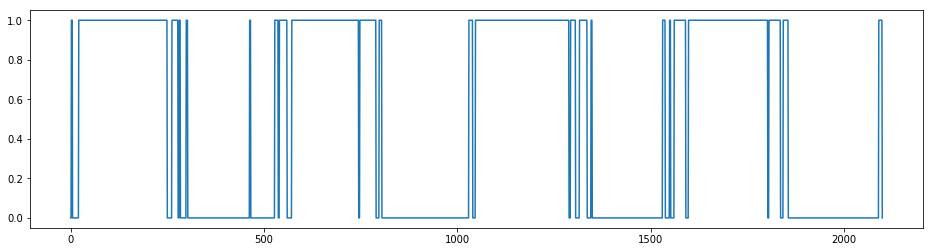

In [153]:
var_list = {
    "limit": 1,
    "type_var":'high', 
    "delay_time" : 10*3/10000, 
    "dead_band_delay" : 10*3/10000
}

t = np.linspace(0, 50, 2100)
ruido = np.random.uniform(-1,1,2100)
x = np.sin((t)*.5)+1+ruido 

log = alarm_generate(x,var_list)
plt.figure(figsize=(16,4))
plt.plot(log)
#plt.plot(x)

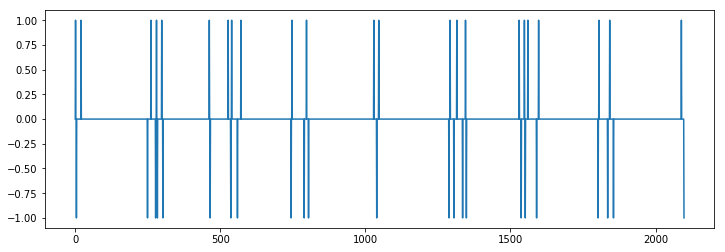

In [154]:
plt.figure(figsize=(12,4))
plt.plot(np.diff(log))

In [155]:
leng = np.diff(log)
run_act = np.clip(leng,0,1)

In [156]:
run_lengths = []
count = 0
for i in np.arange(len(run_act)):
    if run_act[i] == 0:
        count+=1
    else:
        if count != 0:
            run_lengths.append(count)
            count = 0
        else:
            pass

In [157]:
run_lengths
print(run_lengths)
print(len(run_lengths))
print(max(run_lengths))

[1, 18, 240, 18, 17, 163, 64, 11, 31, 175, 49, 231, 16, 245, 22, 29, 184, 17, 11, 36, 207, 36, 246]
23
246


In [158]:
a = run_lengths
unique_elements, counts_elements = np.unique(a, return_counts=True)

Pr = counts_elements/sum(counts_elements)
        
chat_Index = sum(Pr/unique_elements)

chat_fi = sum(counts_elements/unique_elements)/sum(counts_elements)

chat_n = 2*(sum(counts_elements/unique_elements)/len(log))
    
print(unique_elements)
print()
print(counts_elements)
print()
print(chat_Index)
print()
print(chat_fi)
print()
print(chat_n)

[  1  11  16  17  18  22  29  31  36  49  64 163 175 184 207 231 240 245
 246]

[1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1]

0.07459207560811815

0.07459207560811817

0.0016339216561778267


É importante lembrar que essa nova forma de avaliar o chattering index, leva em conta o tamanho da variavel de processo
(ou log) mas tem como limiar, um valor bem menor do que o modo antigo.

chat_index <= 0.05 alarms/s

chat_n <= 0.005 alarms/s

Como uma média geral a respeito do sinal inteiro